# Résultats

## 4 Etude sur Binary Alpha Digit

### RBM

Epoch 0: MSE = 0.202393
Epoch 100: MSE = 0.098222
Epoch 200: MSE = 0.069882
Epoch 300: MSE = 0.053100
Epoch 400: MSE = 0.041407
Epoch 500: MSE = 0.032908
Epoch 600: MSE = 0.026451
Epoch 700: MSE = 0.021517
Epoch 800: MSE = 0.017543
Epoch 900: MSE = 0.014618
Epoch 1000: MSE = 0.012305
Epoch 1100: MSE = 0.010456
Epoch 1200: MSE = 0.008909
Epoch 1300: MSE = 0.007743
Epoch 1400: MSE = 0.006706
Epoch 1500: MSE = 0.005931
Epoch 1600: MSE = 0.005254
Epoch 1700: MSE = 0.004670
Epoch 1800: MSE = 0.004195
Epoch 1900: MSE = 0.003777
Epoch 2000: MSE = 0.003419
Epoch 2100: MSE = 0.003113
Epoch 2200: MSE = 0.002839
Epoch 2300: MSE = 0.002602
Epoch 2400: MSE = 0.002367
Epoch 2500: MSE = 0.002191
Epoch 2600: MSE = 0.002018
Epoch 2700: MSE = 0.001873
Epoch 2800: MSE = 0.001747
Epoch 2900: MSE = 0.001611
Epoch 3000: MSE = 0.001522
Epoch 3100: MSE = 0.001419
Epoch 3200: MSE = 0.001328
Epoch 3300: MSE = 0.001242
Epoch 3400: MSE = 0.001169
Epoch 3500: MSE = 0.001100
Epoch 3600: MSE = 0.001043
Epoch 3700: M

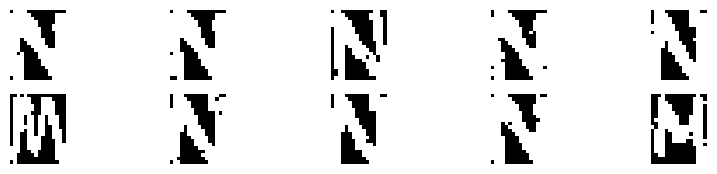

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from load_data import lire_alpha_digit
from Rbm import RBM
from Dbn import DBN

characters = ["m", "n"]
images = lire_alpha_digit(characters)

p = images.shape[1]
hidden_rbm = 128
epochs_rbm = 10000
batch_size = 16
lr_rbm = 0.01

rbm = RBM(p, hidden_rbm)
rbm.train(images, epochs_rbm, batch_size, lr_rbm, verbose=True)

generated_rbm = rbm.generate(10)
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(generated_rbm[i].reshape(20,16), cmap="gray")
    plt.axis("off")
plt.show()



### DBN

MSE = 0.025665


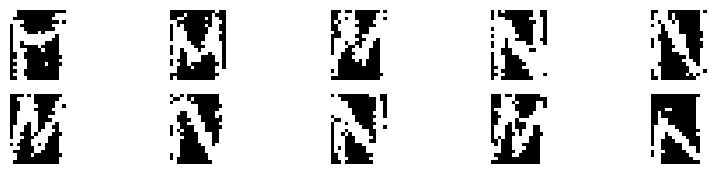

In [3]:
dbn_sizes = [p, 128, 128]
dbn = DBN(dbn_sizes)
epochs_dbn = 10000
batch_size_dbn = 16
lr_dbn = 0.001

dbn.train(images, epochs_dbn, batch_size_dbn, lr_dbn, verbose=True)

generated_dbn = dbn.generate(10)
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(generated_dbn[i].reshape(20,16), cmap="gray")
    plt.axis("off")
plt.show()


## 5 Etudes

### 5.1 

Get mnist data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.nn.functional import one_hot
from Dnn import DNN

# Load MNIST dataset using PyTorch
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: (x >= 0.5).float())  # Apply binarization
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Convert datasets to numpy arrays
x_train = train_dataset.data.numpy().reshape(-1, 28 * 28).astype(np.float32)
y_train = train_dataset.targets.numpy()
x_test = test_dataset.data.numpy().reshape(-1, 28 * 28).astype(np.float32)
y_test = test_dataset.targets.numpy()

# Binarize the dataset
x_train = (x_train >= 128).astype(np.float32)
x_test = (x_test >= 128).astype(np.float32)

# Convert labels to one-hot encoding
y_train = one_hot(torch.tensor(y_train), num_classes=10).numpy()
y_test = one_hot(torch.tensor(y_test), num_classes=10).numpy()



MSE = 0.031612
0 0.37059879211987246
1 0.3094284286290167
2 0.28326878724987675
3 0.26835028831306346
4 0.2581540105502739
5 0.25105244674285787
6 0.2451846909942192
7 0.24065135733103385
8 0.2367853438734813
9 0.233279015715438
10 0.23088809556724935
11 0.22841279296081451
12 0.2262895821133868
13 0.22419465338731429
14 0.22281512051761035
err dnn.test_DNN : 0.0641


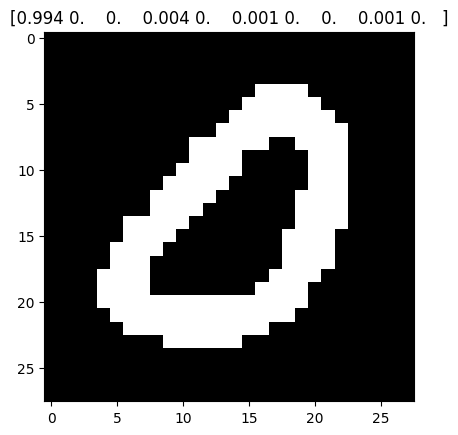

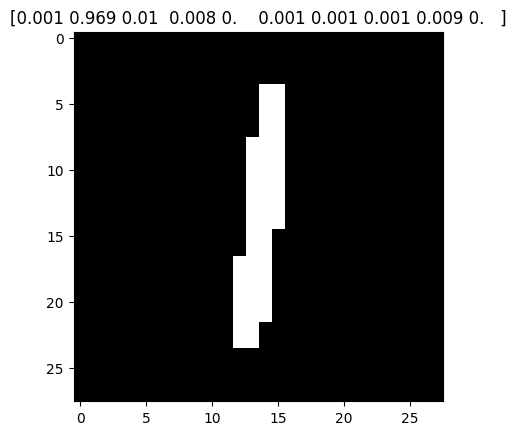

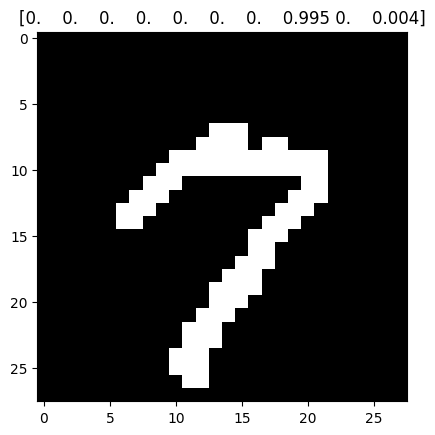

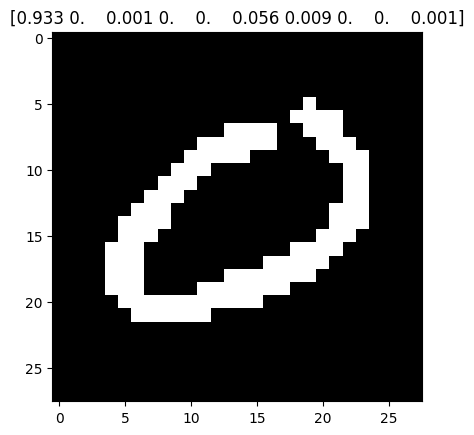

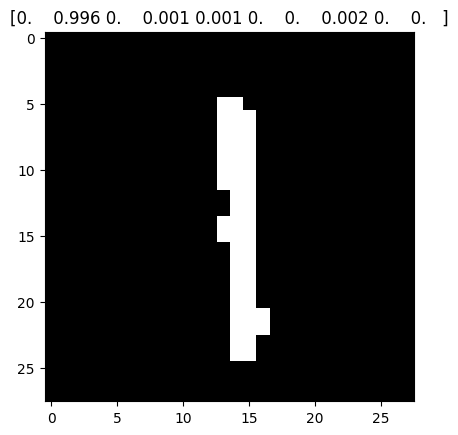

In [15]:
sizes = [784, 256, 128, 10]
dnn = DNN(sizes)

epochs_pretrain = 5
batch_size = 64
lr_pretrain = 0.1
dnn.pretrain(x_train, epochs_pretrain, batch_size, lr_pretrain, verbose=True)

epochs_supervised = 15
lr_supervised = 0.1
dnn.retropropagation(x_train, y_train, epochs_supervised, lr_supervised, batch_size, verbose=True)

err = dnn.test_DNN(x_test, y_test)
print(f"err dnn.test_DNN : {err}")

indices = np.random.choice(len(x_test), 5, replace=False)
samples = x_test[indices]
_, probs = dnn.entree_sortie_reseau(samples)
for i in range(5):
    plt.imshow(samples[i].reshape(28,28), cmap="gray")
    plt.title(np.round(probs[i], 3))
    plt.show()


### 5.2 Analyse. 

MSE = 0.254291
MSE = 0.254121
MSE = 0.255091


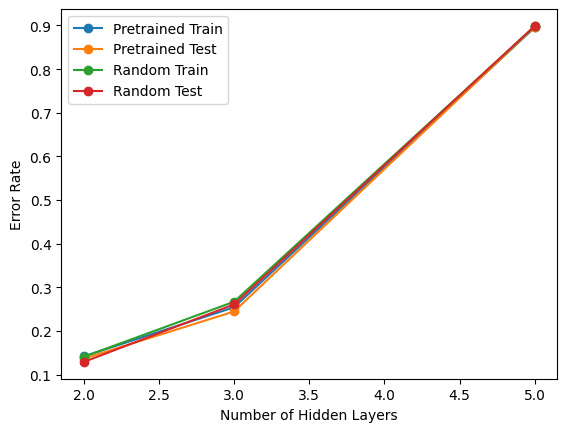

MSE = 0.252383
MSE = 0.255856
MSE = 0.259330


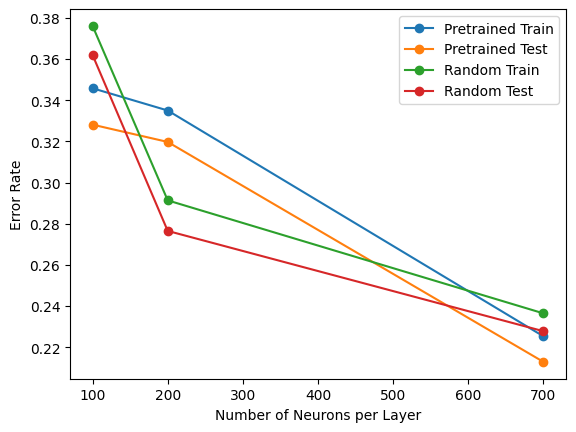

MSE = 0.253892
MSE = 0.248580
MSE = 0.249110
MSE = 0.254030
MSE = 0.248541
MSE = 0.247156


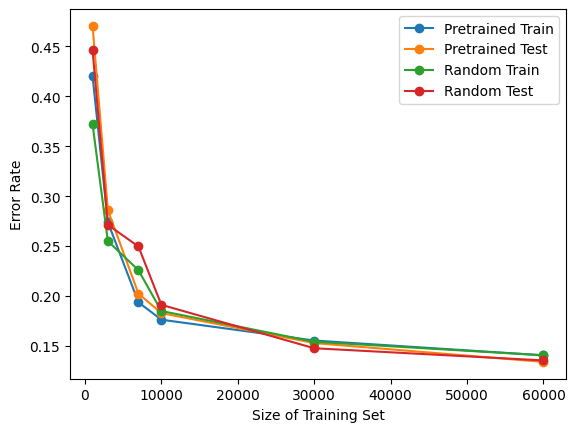

In [16]:
layers_list = [[784, 200, 10], [784, 200, 200, 10], [784, 200, 200, 200, 200, 10]]
train_err_pre, test_err_pre, train_err_rand, test_err_rand = [], [], [], []

for sizes in layers_list:
    dnn_pre = DNN(sizes)
    dnn_rand = DNN(sizes)
    dnn_pre.pretrain(x_train, 5, 64, 0.1, False)
    dnn_pre.retropropagation(x_train, y_train, 20, 0.1, 64, False)
    dnn_rand.retropropagation(x_train, y_train, 20, 0.1, 64, False)
    train_err_pre.append(dnn_pre.test_DNN(x_train, y_train))
    test_err_pre.append(dnn_pre.test_DNN(x_test, y_test))
    train_err_rand.append(dnn_rand.test_DNN(x_train, y_train))
    test_err_rand.append(dnn_rand.test_DNN(x_test, y_test))

plt.plot([2,3,5], train_err_pre, marker='o', label='Pretrained Train')
plt.plot([2,3,5], test_err_pre, marker='o', label='Pretrained Test')
plt.plot([2,3,5], train_err_rand, marker='o', label='Random Train')
plt.plot([2,3,5], test_err_rand, marker='o', label='Random Test')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

neurons_list = [100, 200, 700]
train_err_pre_n, test_err_pre_n, train_err_rand_n, test_err_rand_n = [], [], [], []

for n in neurons_list:
    dnn_pre = DNN([784, n, n, 10])
    dnn_rand = DNN([784, n, n, 10])
    dnn_pre.pretrain(x_train, 5, 64, 0.1, False)
    dnn_pre.retropropagation(x_train, y_train, 20, 0.1, 64, False)
    dnn_rand.retropropagation(x_train, y_train, 20, 0.1, 64, False)
    train_err_pre_n.append(dnn_pre.test_DNN(x_train, y_train))
    test_err_pre_n.append(dnn_pre.test_DNN(x_test, y_test))
    train_err_rand_n.append(dnn_rand.test_DNN(x_train, y_train))
    test_err_rand_n.append(dnn_rand.test_DNN(x_test, y_test))

plt.plot(neurons_list, train_err_pre_n, marker='o', label='Pretrained Train')
plt.plot(neurons_list, test_err_pre_n, marker='o', label='Pretrained Test')
plt.plot(neurons_list, train_err_rand_n, marker='o', label='Random Train')
plt.plot(neurons_list, test_err_rand_n, marker='o', label='Random Test')
plt.xlabel('Number of Neurons per Layer')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

data_sizes = [1000, 3000, 7000, 10000, 30000, 60000]
train_err_pre_d, test_err_pre_d, train_err_rand_d, test_err_rand_d = [], [], [], []

for d in data_sizes:
    x_train_sub = x_train[:d]
    y_train_sub = y_train[:d]
    dnn_pre = DNN([784, 200, 10])
    dnn_rand = DNN([784, 200, 10])
    dnn_pre.pretrain(x_train_sub, 5, 64, 0.01, False)
    dnn_pre.retropropagation(x_train_sub, y_train_sub, 20, 0.1, 64, False)
    dnn_rand.retropropagation(x_train_sub, y_train_sub, 20, 0.1, 64, False)
    train_err_pre_d.append(dnn_pre.test_DNN(x_train_sub, y_train_sub))
    test_err_pre_d.append(dnn_pre.test_DNN(x_test, y_test))
    train_err_rand_d.append(dnn_rand.test_DNN(x_train_sub, y_train_sub))
    test_err_rand_d.append(dnn_rand.test_DNN(x_test, y_test))

plt.plot(data_sizes, train_err_pre_d, marker='o', label='Pretrained Train')
plt.plot(data_sizes, test_err_pre_d, marker='o', label='Pretrained Test')
plt.plot(data_sizes, train_err_rand_d, marker='o', label='Random Train')
plt.plot(data_sizes, test_err_rand_d, marker='o', label='Random Test')
plt.xlabel('Size of Training Set')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

# Bonus 